<a href="https://colab.research.google.com/github/jcmachicao/curso_intro_nn/blob/main/ensayo_convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [5]:
if torch.cuda.is_available():
  print(torch.cuda.device_count())
  print(torch.cuda.get_device_name(0))
else:
  print('No hay conexión a GPU')

No hay conexión a GPU


## Carga de archivo de texto

In [3]:
vecs = pd.read_excel('drive/My Drive/00 data/bd100_scom_vecs.xlsx')
vecs.head(2)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,clase
0,0,0.179355,0.105002,-0.064927,0.185435,0.435803,-0.306217,-0.011068,0.008246,-0.163101,...,0.071025,-0.054219,0.098506,-0.428157,-0.116313,0.027295,0.022213,0.160096,0.099741,no reembolso de dinero
1,1,0.006646,-0.020737,-0.023811,0.023838,0.053261,-0.079269,-0.017070,-0.069743,-0.041027,...,0.006383,0.009211,0.003845,0.015106,-0.002231,-0.072769,0.068407,-0.032824,0.061957,no reembolso de dinero


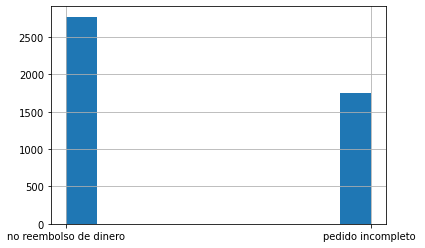

In [6]:
vecs.clase.hist()

## Vectorización

In [7]:
vecs_arr = np.array(vecs.iloc[:, 1:101])
vecs_arr.shape

(4520, 100)

In [8]:
vecs_arr2 = vecs_arr.reshape(-1, 10, 10)
vecs_arr2.shape

(4520, 10, 10)

In [ ]:
n_samp = 2000
input = torch.tensor(vecs_arr2[:n_samp])
input.shape

torch.Size([2000, 10, 10])

## Prueba Gráfica Convolucional

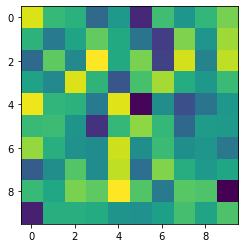

In [ ]:
plt.imshow(input[10])

torch.Size([15, 10, 10])


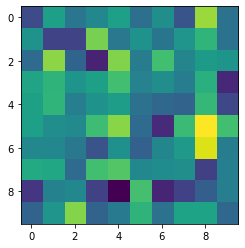

In [ ]:
data = torch.randn(15, 10, 10)
print(data.shape)
plt.imshow(data[0].detach())

torch.Size([2000, 8, 8])


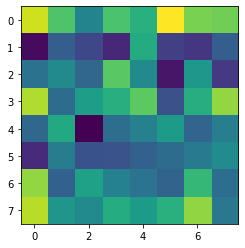

In [ ]:
m = torch.nn.Conv1d(in_channels=10, out_channels=8, kernel_size=3, stride=1)
b = m(input.float())
print(b.shape)
plt.imshow(b[0].detach())

torch.Size([2000, 6, 6])


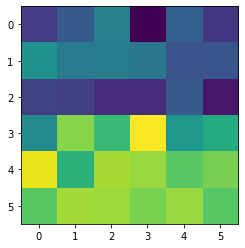

In [ ]:
m1 = torch.nn.Conv1d(in_channels=8, out_channels=6, kernel_size=3, stride=1)
b1 = m1(b)
print(b1.shape)
plt.imshow(b1[0].detach())

In [ ]:
m2 = torch.nn.Conv1d(in_channels=6, out_channels=1, kernel_size=5, stride=1)
b2 = m2(b1)
b2.shape

torch.Size([2000, 1, 2])

## Modelo

In [ ]:
factores = pd.factorize(vecs.clase)
y_b = factores[0][:n_samp].astype(float)
lf = len(factores[1])
factores[1], lf

(Index(['no reembolso de dinero', 'pedido incompleto '], dtype='object'), 2)

In [ ]:
y_tn = torch.from_numpy(y_b)
y_tn.shape

torch.Size([2000])

In [ ]:
X_tn = input
X_tn.shape

torch.Size([2000, 10, 10])

In [ ]:
modelo100 = torch.nn.Sequential(
    torch.nn.Conv1d(in_channels=10, out_channels=8, kernel_size=3, stride=1),
    torch.nn.Conv1d(in_channels=8, out_channels=6, kernel_size=3, stride=1),
    torch.nn.Conv1d(in_channels=6, out_channels=1, kernel_size=5, stride=1),
)

In [ ]:
class Net():
  def __init__():
    super.

In [ ]:
modelo100.cuda()
X = X_tn.cuda()
y = y_tn.cuda()

In [ ]:
modelo100

Sequential(
  (0): Conv1d(10, 8, kernel_size=(3,), stride=(1,))
  (1): Conv1d(8, 6, kernel_size=(3,), stride=(1,))
  (2): Conv1d(6, 1, kernel_size=(5,), stride=(1,))
)

In [ ]:
optimizer = torch.optim.SGD(modelo100.parameters(), lr=0.001, momentum=0)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 20000
for epo in range(epochs):
  optimizer.zero_grad()
  y_pred = modelo100(X.float())
  loss = criterion(y_pred.squeeze(), y.long())
  loss.backward()
  optimizer.step()
  if epo % 1000 == 0:
    print(epo, loss.item())

0 0.007951300591230392
1000 0.007923798635601997
2000 0.007896604016423225
3000 0.007869729772210121
4000 0.007843184284865856
5000 0.00781696941703558
6000 0.007791089825332165
7000 0.007765485905110836
8000 0.00774011155590415
9000 0.007715016137808561
10000 0.0076902457512915134
11000 0.007665805518627167
12000 0.007641665171831846
13000 0.007617839612066746
14000 0.00759435910731554
15000 0.00757113192230463
16000 0.007548137102276087
17000 0.007525340653955936
18000 0.007502763532102108
19000 0.00748051144182682


In [ ]:
y_pred.squeeze()

tensor([[ 10.0622, -10.7914],
        [  1.4826,  -1.9260],
        [  6.2877,  -5.3601],
        ...,
        [  3.5353,  -3.3105],
        [ 10.2038, -10.0674],
        [ 15.0488, -14.1184]], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [ ]:
y.long()

tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')

In [ ]:
y_pred_np = y_pred.squeeze().cpu().data.numpy()

In [ ]:
y_p = y_pred_np.squeeze()

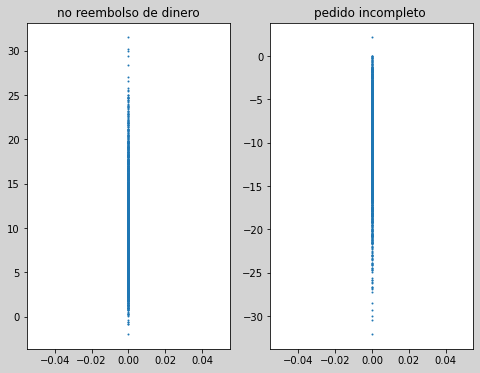

In [ ]:
fig, ax = plt.subplots(1, lf, figsize=(8, 6), facecolor='lightgray')
for j in range(lf):
  ax[j].scatter(factores[0][:n_samp], y_p[:,j], label=j, s=1)
  ax[j].set_title(factores[1][:n_samp][j], fontsize=12)
  #ax[j].set_ylim(-30,30)
  #ax[j].set_xlim(-1,6)
#plt.savefig(ruta + 'd20_x2__' +str(k) +'nn_indecopi.png')
plt.show()

In [ ]:
X_ts = torch.tensor(vecs_arr2[n_samp:])
X_ts = X_ts.cuda()
y_ts = factores[0][n_samp:]

In [ ]:
X_ts.shape, y_ts.shape

(torch.Size([2520, 10, 10]), (2520,))

In [ ]:
predicciones = []
with torch.no_grad():
  optimizer.zero_grad()
  y_pred_ts = modelo100(X_ts.float())
  _, pred = torch.max(y_pred_ts.squeeze().data, 1)
  pred_np = pred.cpu().data.numpy()
  for it in pred_np:
    predicciones.append(it)

In [ ]:
suma = 0
for a, b in zip(predicciones, list(y_ts)):
  suma += (a==b) * 1
suma / len(input)

0.3895

In [ ]:
#@title Grabación del Modelo en Drive
ruta = 'drive/My Drive/2020 data/'
torch.save(modelo100.state_dict(), ruta + 'modelo_ind_scom_nnconv_38.pkl')